In [1]:
import os
from datetime import datetime, timedelta
import pandas as pd

from dotenv import dotenv_values

import myenergi

env_path = os.path.expanduser("~/.env")
if os.path.exists(env_path):
    env = dotenv_values(env_path)

with myenergi.API(env.get('myenergi_serial'), env.get('myenergi_password')) as mye:
    # If no zappi detected then exit
    if mye.get_serials(myenergi.MyenergiType.ZAPPI) is None:
        pass
    else:
        # For each zappi detected for the account
        for zappiserial in mye.get_serials(myenergi.MyenergiType.ZAPPI):
            starttime = datetime.now() - timedelta(days=1)
            datestring = starttime.strftime("%Y-%m-%d")
            history = mye.get_zappi_daily_total(zappiserial, datestring, 50)

    data = pd.DataFrame(history.history_data)

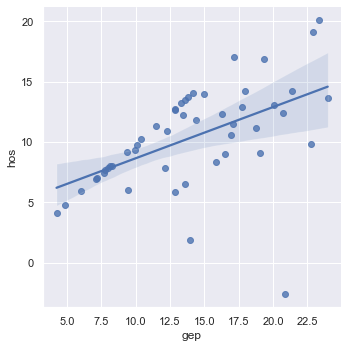

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.lmplot(x="gep", y="hos", data=data)

In [6]:
data.corr().abs()[["hos"]]

,hos
hog,0.401508
hos,1.000000
h1d,0.356641
h1b,0.278640
imp,0.134365
exp,0.006097
gep,0.524319
gen,0.032926
